<a href="https://colab.research.google.com/github/felixn95/oil-palm-detection/blob/main/data_processing/Exploration_Confidence_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing


In [1]:
!pip install torch torchvision

In [2]:
!pip install fastai neptune neptune-fastai --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.5/481.5 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 1.7 MB/s eta 0:00:00


In [3]:
# load data set & unzip

!wget https://github.com/felixn95/tds_project/raw/main/wisdatathon2019.zip
!unzip wisdatathon2019.zip
!unzip wisdatathon2019/train_images.zip
!unzip wisdatathon2019/leaderboard_test_data.zip

train_images = '/content/train_images'
test_images =  '/content/leaderboard_test_data'
train_labels = '/content/wisdatathon2019/traininglabels.csv'
test_labels = '/content/wisdatathon2019/testlabels.csv'

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
  inflating: leaderboard_test_data/img_04013.jpg  
  inflating: leaderboard_test_data/img_04014.jpg  
  inflating: leaderboard_test_data/img_04015.jpg  
  inflating: leaderboard_test_data/img_04016.jpg  
  inflating: leaderboard_test_data/img_04017.jpg  
  inflating: leaderboard_test_data/img_04018.jpg  
  inflating: leaderboard_test_data/img_04019.jpg  
  inflating: leaderboard_test_data/img_04020.jpg  
  inflating: leaderboard_test_data/img_04021.jpg  
  inflating: leaderboard_test_data/img_04022.jpg  
  inflating: leaderboard_test_data/img_04023.jpg  
  inflating: leaderboard_test_data/img_04024.jpg  
  inflating: leaderboard_test_data/img_04025.jpg  
  inflating: leaderboard_test_data/img_04026.jpg  
  inflating: leaderboard_test_data/img_04027.jpg  
  inflating: leaderboard_test_data/img_04028.jpg  
  inflating: leaderboard_test_data/img_04029.jpg  
  inflating: leaderboard_test_data/img_04030.jpg  
  inflating: le

The labeled images in the labels csv's do not fit to the image ids, because we need to remove the year at the end of the string in each row.

In [4]:
import pandas as pd
import os

def adjust_image_ids(input_csv_path, output_csv_path):
    """
    Adjusts the image_ids in the input CSV file by removing the year digits before '.jpg'
    and saves the modified DataFrame to the output CSV path.
    """

    df = pd.read_csv(input_csv_path)

    # Modify the 'image_id' column
    df['image_id'] = df['image_id'].str.replace(r'\d{4}\.jpg', '.jpg', regex=True)

    # Save to the output CSV file
    df.to_csv(output_csv_path, index=False)


adjust_image_ids(train_labels, 'traininglabels_processed.csv')
adjust_image_ids(test_labels, 'testlabels_processed.csv')

train_labels = '/content/traininglabels_processed.csv'
test_labels = '/content/testlabels_processed.csv'

def filter_missing_images(csv_file, image_dir, target_file):
    # Read the CSV file
    df = pd.read_csv(csv_file)

    # Filter out rows where the image file does not exist
    df_filtered = df[df['image_id'].apply(lambda x: os.path.exists(os.path.join(image_dir, x)))]

    # Save the filtered DataFrame
    df_filtered.to_csv(target_file, index=False)

filter_missing_images(train_labels, train_images, '/content/train_labels_filtered.csv')
filter_missing_images(test_labels, test_images, '/content/test_labels_filtered.csv')

train_labels = '/content/train_labels_filtered.csv'
test_labels = '/content/test_labels_filtered.csv'


# Confidence Score

Each image is also labeled with a "score", which represents the confidence score based on the aggregated results from crowdsourcing the annotations. This describes the level of agreement between multiple contributors, weighted by the contributor's trust score.

We can now have a look how many scores are below 60% confidence.

In [5]:
df_train_labels = pd.read_csv(train_labels)
df_train_labels[df_train_labels['score']<0.6]

,image_id,has_oilpalm,score
72,img_00109.jpg,1,0.3944
76,img_00114.jpg,0,0.5531
270,img_00422.jpg,1,0.3965
303,img_00465.jpg,0,0.5836
347,img_00525.jpg,0,0.5983
...,...,...,...
14937,img_10816.jpg,0,0.5994
14967,img_10862.jpg,0,0.5993
15012,img_10931.jpg,0,0.5996
15021,img_10943.jpg,0,0.4052


# Training & Monitoring
For training we will use FastAI in combination with a monitoring tool called neptune-ai (https://docs.neptune.ai/) for model tracking and evaluation.

In [6]:
import neptune
import torch
import fastai
from fastai.callback.all import SaveModelCallback
from fastai.vision.all import *
from neptune.integrations.fastai import NeptuneCallback
from neptune.types import File

To improve the performance we want to test what impact images with low confidence score have on our model training.

In this case we take a closer look on the model 'squeezenet1_0' and test the performance with filtered dataset.

But first of all we look at the performance of squeezenet1_0 when training the model with the complete dataset.

In [7]:
# initialize neptune ai
run = neptune.init_run(project='tds-ws23/preprocessed-confidence-score', api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI2ZjExOTA0Yy0zZjhhLTQ3Y2MtYjYzNy1kY2Q1OGMwODAyYWUifQ==",
                   tags="squeezenet1_0")

<ipython-input-7-5bf0bf2f3887>:2: NeptuneWarning: The following monitoring options are disabled by default in interactive sessions: 'capture_stdout', 'capture_stderr', 'capture_traceback', and 'capture_hardware_metrics'. To enable them, set each parameter to 'True' when initializing the run. The monitoring will continue until you call run.stop() or the kernel stops. Also note: Your source files can only be tracked if you pass the path(s) to the 'source_code' argument. For help, see the Neptune docs: https://docs.neptune.ai/logging/source_code/
  run = neptune.init_run(project='tds-ws23/preprocessed-confidence-score', api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI2ZjExOTA0Yy0zZjhhLTQ3Y2MtYjYzNy1kY2Q1OGMwODAyYWUifQ==",


https://app.neptune.ai/tds-ws23/preprocessed-confidence-score/e/PREP-5


In [10]:
def get_x(row):
    return os.path.join(train_images, row['image_id'])

def get_y(row):
    return row['has_oilpalm']

# create data block

palm_data_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_x=get_x,
    get_y=get_y,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=Resize(256),
    batch_tfms=aug_transforms()
)

dls = palm_data_block.dataloaders(pd.read_csv(train_labels), bs=64)

Downloading: "https://download.pytorch.org/models/squeezenet1_0-b66bff10.pth" to /root/.cache/torch/hub/checkpoints/squeezenet1_0-b66bff10.pth
100%|██████████| 4.78M/4.78M [00:00<00:00, 65.0MB/s]
/usr/local/lib/python3.10/dist-packages/neptune_fastai/impl/__init__.py:247: UserWarning: NeptuneCallback: SaveModelCallback is necessary for uploading model checkpoints.
  warnings.warn("NeptuneCallback: SaveModelCallback is necessary for uploading model checkpoints.")


epoch,train_loss,valid_loss,accuracy,time
0,0.388467,0.255254,0.916307,00:50


epoch,train_loss,valid_loss,accuracy,time
0,0.218070,0.231041,0.924610,01:04
1,0.211334,0.222252,0.928595,01:02
2,0.227265,0.218969,0.931916,01:06
3,0.220214,0.231209,0.926602,01:03
4,0.226458,0.217292,0.932581,01:05
5,0.218646,0.256637,0.930256,01:05
6,0.217257,0.226005,0.934241,01:04


No improvement since epoch 4: early stopping
Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 106 operations to synchronize with Neptune. Do not kill this process.
All 106 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/tds-ws23/preprocessed-confidence-score/e/PREP-5/metadata


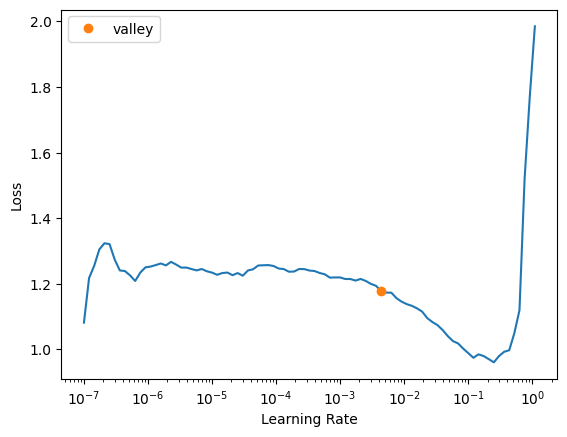

In [12]:
# Neptune callback object
neptune_cbk = NeptuneCallback(run=run)

# Create a fast ai learner and pass the model and NeptuneCallback parameters including the specific run
learner = vision_learner(dls, squeezenet1_0, cbs=[neptune_cbk], metrics=accuracy)

# Find learning rate
lr_rate = learner.lr_find()
base_lr = lr_rate.valley

# Define Early Stopping Callback-function
early_stop_cbk = EarlyStoppingCallback(monitor='valid_loss', patience=2)

# Train the model with optimal number of epochs
learner.fine_tune(epochs=20, base_lr=base_lr, cbs=[early_stop_cbk, neptune_cbk])

run.stop()

## Score > 0.75

Now we test the performance of squeezenet1_0 only using images where the confidence score is over 0,75 for training.

In [ ]:
# Filter out rows where the score is under 0.75
filtered_df_train_labels = df_train_labels[df_train_labels['score'] >= 0.75]


# Save the filtered labels to a new CSV file
filtered_labels_path = '/content/filtered_training_labels.csv'
filtered_df_train_labels.to_csv(filtered_labels_path, index=False)


train_labels = '/content/filtered_training_labels.csv'

In [ ]:
filtered_df_train_labels

,image_id,has_oilpalm,score
0,img_00000.jpg,0,0.7895
1,img_00001.jpg,0,1.0000
2,img_00002.jpg,0,1.0000
3,img_00007.jpg,0,1.0000
4,img_00008.jpg,0,1.0000
...,...,...,...
15051,img_10992.jpg,0,0.8107
15052,img_10994.jpg,0,1.0000
15053,img_10995.jpg,0,1.0000
15054,img_10997.jpg,0,1.0000


In [ ]:
# initialize neptune ai
run = neptune.init_run(project='tds-ws23/preprocessed-confidence-score', api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI2ZjExOTA0Yy0zZjhhLTQ3Y2MtYjYzNy1kY2Q1OGMwODAyYWUifQ==",
                   tags="squeezenet1_0-score>0.75")


https://app.neptune.ai/tds-ws23/preprocessed-confidence-score/e/PREP-2


In [ ]:
def get_x(row):
    return os.path.join(train_images, row['image_id'])

def get_y(row):
    return row['has_oilpalm']

# create data block

palm_data_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_x=get_x,
    get_y=get_y,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=Resize(256),
    batch_tfms=aug_transforms()
)

In [ ]:
dls = palm_data_block.dataloaders(pd.read_csv(filtered_labels_path), bs=64)

/usr/local/lib/python3.10/dist-packages/neptune_fastai/impl/__init__.py:247: UserWarning: NeptuneCallback: SaveModelCallback is necessary for uploading model checkpoints.
  warnings.warn("NeptuneCallback: SaveModelCallback is necessary for uploading model checkpoints.")


epoch,train_loss,valid_loss,accuracy,time
0,0.399327,0.227840,0.937960,00:46


epoch,train_loss,valid_loss,accuracy,time
0,0.219393,0.188847,0.943568,01:01
1,0.232751,0.201984,0.934805,00:58
2,0.212706,0.183946,0.943919,00:57
3,0.213782,0.195679,0.937259,00:59
4,0.212888,0.196629,0.939012,01:00


No improvement since epoch 2: early stopping
Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 82 operations to synchronize with Neptune. Do not kill this process.
All 82 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/tds-ws23/preprocessed-confidence-score/e/PREP-2/metadata


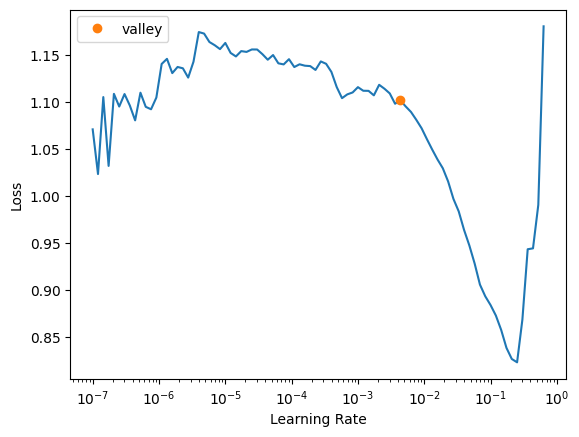

In [ ]:
# Neptune callback object
neptune_cbk = NeptuneCallback(run=run)

# Create a fast ai learner and pass the model and NeptuneCallback parameters including the specific run
learner = vision_learner(dls, squeezenet1_0, cbs=[neptune_cbk], metrics=accuracy)

# Find learning rate
lr_rate = learner.lr_find()
base_lr = lr_rate.valley

# Define Early Stopping Callback-function
early_stop_cbk = EarlyStoppingCallback(monitor='valid_loss', patience=2)

# Train the model with optimal number of epochs
learner.fine_tune(epochs=20, base_lr=base_lr, cbs=[early_stop_cbk, neptune_cbk])

run.stop()

So the performance is getting a little bit better. Lets try again with a higher score.

## Score > 0.9

Let's look at the model performance when we only take images where the confidence score is above 90%.


In [ ]:
# Filter out rows where the score is under 0.75
filtered_df_train_labels = df_train_labels[df_train_labels['score'] >= 0.9]


# Save the filtered labels to a new CSV file
filtered_labels_path = '/content/filtered_training_labels.csv'
filtered_df_train_labels.to_csv(filtered_labels_path, index=False)


train_labels = '/content/filtered_training_labels.csv'

In [ ]:
filtered_df_train_labels

,image_id,has_oilpalm,score
1,img_00001.jpg,0,1.0
2,img_00002.jpg,0,1.0
3,img_00007.jpg,0,1.0
4,img_00008.jpg,0,1.0
5,img_00009.jpg,0,1.0
...,...,...,...
15050,img_10989.jpg,0,1.0
15052,img_10994.jpg,0,1.0
15053,img_10995.jpg,0,1.0
15054,img_10997.jpg,0,1.0


In [ ]:
# initialize neptune ai
run = neptune.init_run(project='tds-ws23/preprocessed-confidence-score', api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI2ZjExOTA0Yy0zZjhhLTQ3Y2MtYjYzNy1kY2Q1OGMwODAyYWUifQ==",
                   tags="squeezenet1_0-score>0.9")


https://app.neptune.ai/tds-ws23/preprocessed-confidence-score/e/PREP-3


In [ ]:
def get_x(row):
    return os.path.join(train_images, row['image_id'])

def get_y(row):
    return row['has_oilpalm']

# create data block

palm_data_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_x=get_x,
    get_y=get_y,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=Resize(256),
    batch_tfms=aug_transforms()
)

In [ ]:
dls = palm_data_block.dataloaders(pd.read_csv(filtered_labels_path), bs=64)

/usr/local/lib/python3.10/dist-packages/neptune_fastai/impl/__init__.py:247: UserWarning: NeptuneCallback: SaveModelCallback is necessary for uploading model checkpoints.
  warnings.warn("NeptuneCallback: SaveModelCallback is necessary for uploading model checkpoints.")


epoch,train_loss,valid_loss,accuracy,time
0,0.420849,0.288497,0.921608,00:44


epoch,train_loss,valid_loss,accuracy,time
0,0.234931,0.208254,0.934341,00:53
1,0.230657,0.206076,0.936331,00:54
2,0.209881,0.186416,0.936729,00:55
3,0.229129,0.236208,0.933944,00:52
4,0.211312,0.197131,0.938321,00:51


No improvement since epoch 2: early stopping
Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 66 operations to synchronize with Neptune. Do not kill this process.
All 66 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/tds-ws23/preprocessed-confidence-score/e/PREP-3/metadata


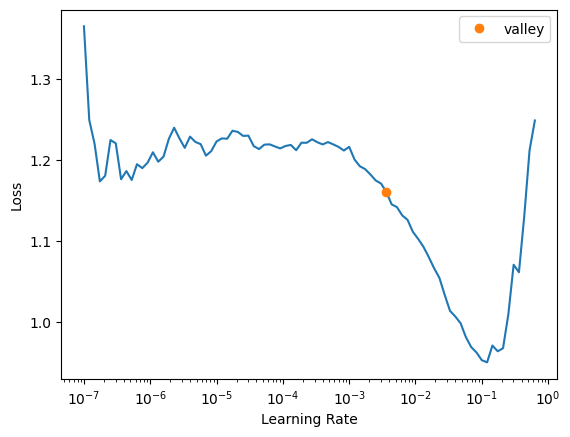

In [ ]:
# Neptune callback object
neptune_cbk = NeptuneCallback(run=run)

# Create a fast ai learner and pass the model and NeptuneCallback parameters including the specific run
learner = vision_learner(dls, squeezenet1_0, cbs=[neptune_cbk], metrics=accuracy)

# Find learning rate
lr_rate = learner.lr_find()
base_lr = lr_rate.valley

# Define Early Stopping Callback-function
early_stop_cbk = EarlyStoppingCallback(monitor='valid_loss', patience=2)

# Train the model with optimal number of epochs
learner.fine_tune(epochs=20, base_lr=base_lr, cbs=[early_stop_cbk, neptune_cbk])

run.stop()

## Score = 1

Let's compare the results of the performance when we only use images where the confidence score equals one

In [13]:
# Filter out rows where the score is under 0.75
filtered_df_train_labels = df_train_labels[df_train_labels['score'] >= 1]


# Save the filtered labels to a new CSV file
filtered_labels_path = '/content/filtered_training_labels.csv'
filtered_df_train_labels.to_csv(filtered_labels_path, index=False)


train_labels = '/content/filtered_training_labels.csv'

In [14]:
filtered_df_train_labels

,image_id,has_oilpalm,score
1,img_00001.jpg,0,1.0
2,img_00002.jpg,0,1.0
3,img_00007.jpg,0,1.0
4,img_00008.jpg,0,1.0
5,img_00009.jpg,0,1.0
...,...,...,...
15050,img_10989.jpg,0,1.0
15052,img_10994.jpg,0,1.0
15053,img_10995.jpg,0,1.0
15054,img_10997.jpg,0,1.0


In [15]:
# initialize neptune ai
run = neptune.init_run(project='tds-ws23/preprocessed-confidence-score', api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI2ZjExOTA0Yy0zZjhhLTQ3Y2MtYjYzNy1kY2Q1OGMwODAyYWUifQ==",
                   tags="squeezenet1_0-score=1")


<ipython-input-15-dac6ba9232d2>:2: NeptuneWarning: The following monitoring options are disabled by default in interactive sessions: 'capture_stdout', 'capture_stderr', 'capture_traceback', and 'capture_hardware_metrics'. To enable them, set each parameter to 'True' when initializing the run. The monitoring will continue until you call run.stop() or the kernel stops. Also note: Your source files can only be tracked if you pass the path(s) to the 'source_code' argument. For help, see the Neptune docs: https://docs.neptune.ai/logging/source_code/
  run = neptune.init_run(project='tds-ws23/preprocessed-confidence-score', api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI2ZjExOTA0Yy0zZjhhLTQ3Y2MtYjYzNy1kY2Q1OGMwODAyYWUifQ==",


https://app.neptune.ai/tds-ws23/preprocessed-confidence-score/e/PREP-4


In [17]:
def get_x(row):
    return os.path.join(train_images, row['image_id'])

def get_y(row):
    return row['has_oilpalm']

# create data block

palm_data_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_x=get_x,
    get_y=get_y,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=Resize(256),
    batch_tfms=aug_transforms()
)

In [18]:
dls = palm_data_block.dataloaders(pd.read_csv(filtered_labels_path), bs=64)

Downloading: "https://download.pytorch.org/models/squeezenet1_0-b66bff10.pth" to /root/.cache/torch/hub/checkpoints/squeezenet1_0-b66bff10.pth
100%|██████████| 4.78M/4.78M [00:00<00:00, 42.9MB/s]
/usr/local/lib/python3.10/dist-packages/neptune_fastai/impl/__init__.py:247: UserWarning: NeptuneCallback: SaveModelCallback is necessary for uploading model checkpoints.
  warnings.warn("NeptuneCallback: SaveModelCallback is necessary for uploading model checkpoints.")


epoch,train_loss,valid_loss,accuracy,time
0,0.378478,0.277324,0.935933,00:42


epoch,train_loss,valid_loss,accuracy,time
0,0.224019,0.217771,0.931954,00:57
1,0.214829,0.200971,0.934341,00:53
2,0.199466,0.262073,0.936331,00:52
3,0.229019,0.211003,0.937127,00:52


No improvement since epoch 1: early stopping
Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 66 operations to synchronize with Neptune. Do not kill this process.
All 66 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/tds-ws23/preprocessed-confidence-score/e/PREP-4/metadata


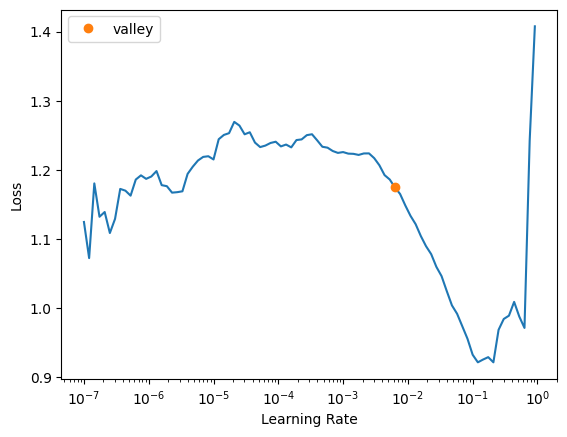

In [19]:
# Neptune callback object
neptune_cbk = NeptuneCallback(run=run)

# Create a fast ai learner and pass the model and NeptuneCallback parameters including the specific run
learner = vision_learner(dls, squeezenet1_0, cbs=[neptune_cbk], metrics=accuracy)

# Find learning rate
lr_rate = learner.lr_find()
base_lr = lr_rate.valley

# Define Early Stopping Callback-function
early_stop_cbk = EarlyStoppingCallback(monitor='valid_loss', patience=2)

# Train the model with optimal number of epochs
learner.fine_tune(epochs=20, base_lr=base_lr, cbs=[early_stop_cbk, neptune_cbk])

run.stop()